In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IN this bank churn data here we are finding that,why the customers left the bank?

In [2]:
#load the data
df = pd.read_csv(r"C:\Users\ASUS\Desktop\ai and ml\data\Bank_churn_modelling.csv")
df.shape

(10000, 14)

# Data Analytics Pipleline

1. Data collection -  capturing data from different sources and creatung a datasets
2. Data exploration-
      - understand data
      - understanding business logic
      - identify faults/ possible threats in data
3. Data cleaning
4. Exploration Analysis - Explore data using and visualization
5. creating report


# Data Exploration

In [11]:
df.shape#

(10000, 14)

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# check for unique values in geography and gender
#here we are not checking the unique values of surname because there are 10,000 unique surnames
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
#to get statistical summary of data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#3 levels of analyctics
 1. uni variate analysis is not target inferred(here we dont compare with anyone)
 2. bi variate analysis is a target inferred(here we compare one column with targeted)
 3. multi variate analysis(here multi cloumns are compared with targeted

In [15]:
#check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
#without using sum (if there are any missing value then it will show True)
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#check for duplicates
df.duplicated().sum()

0

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Analysis
  
  BIVARIATE ANALYSIS

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


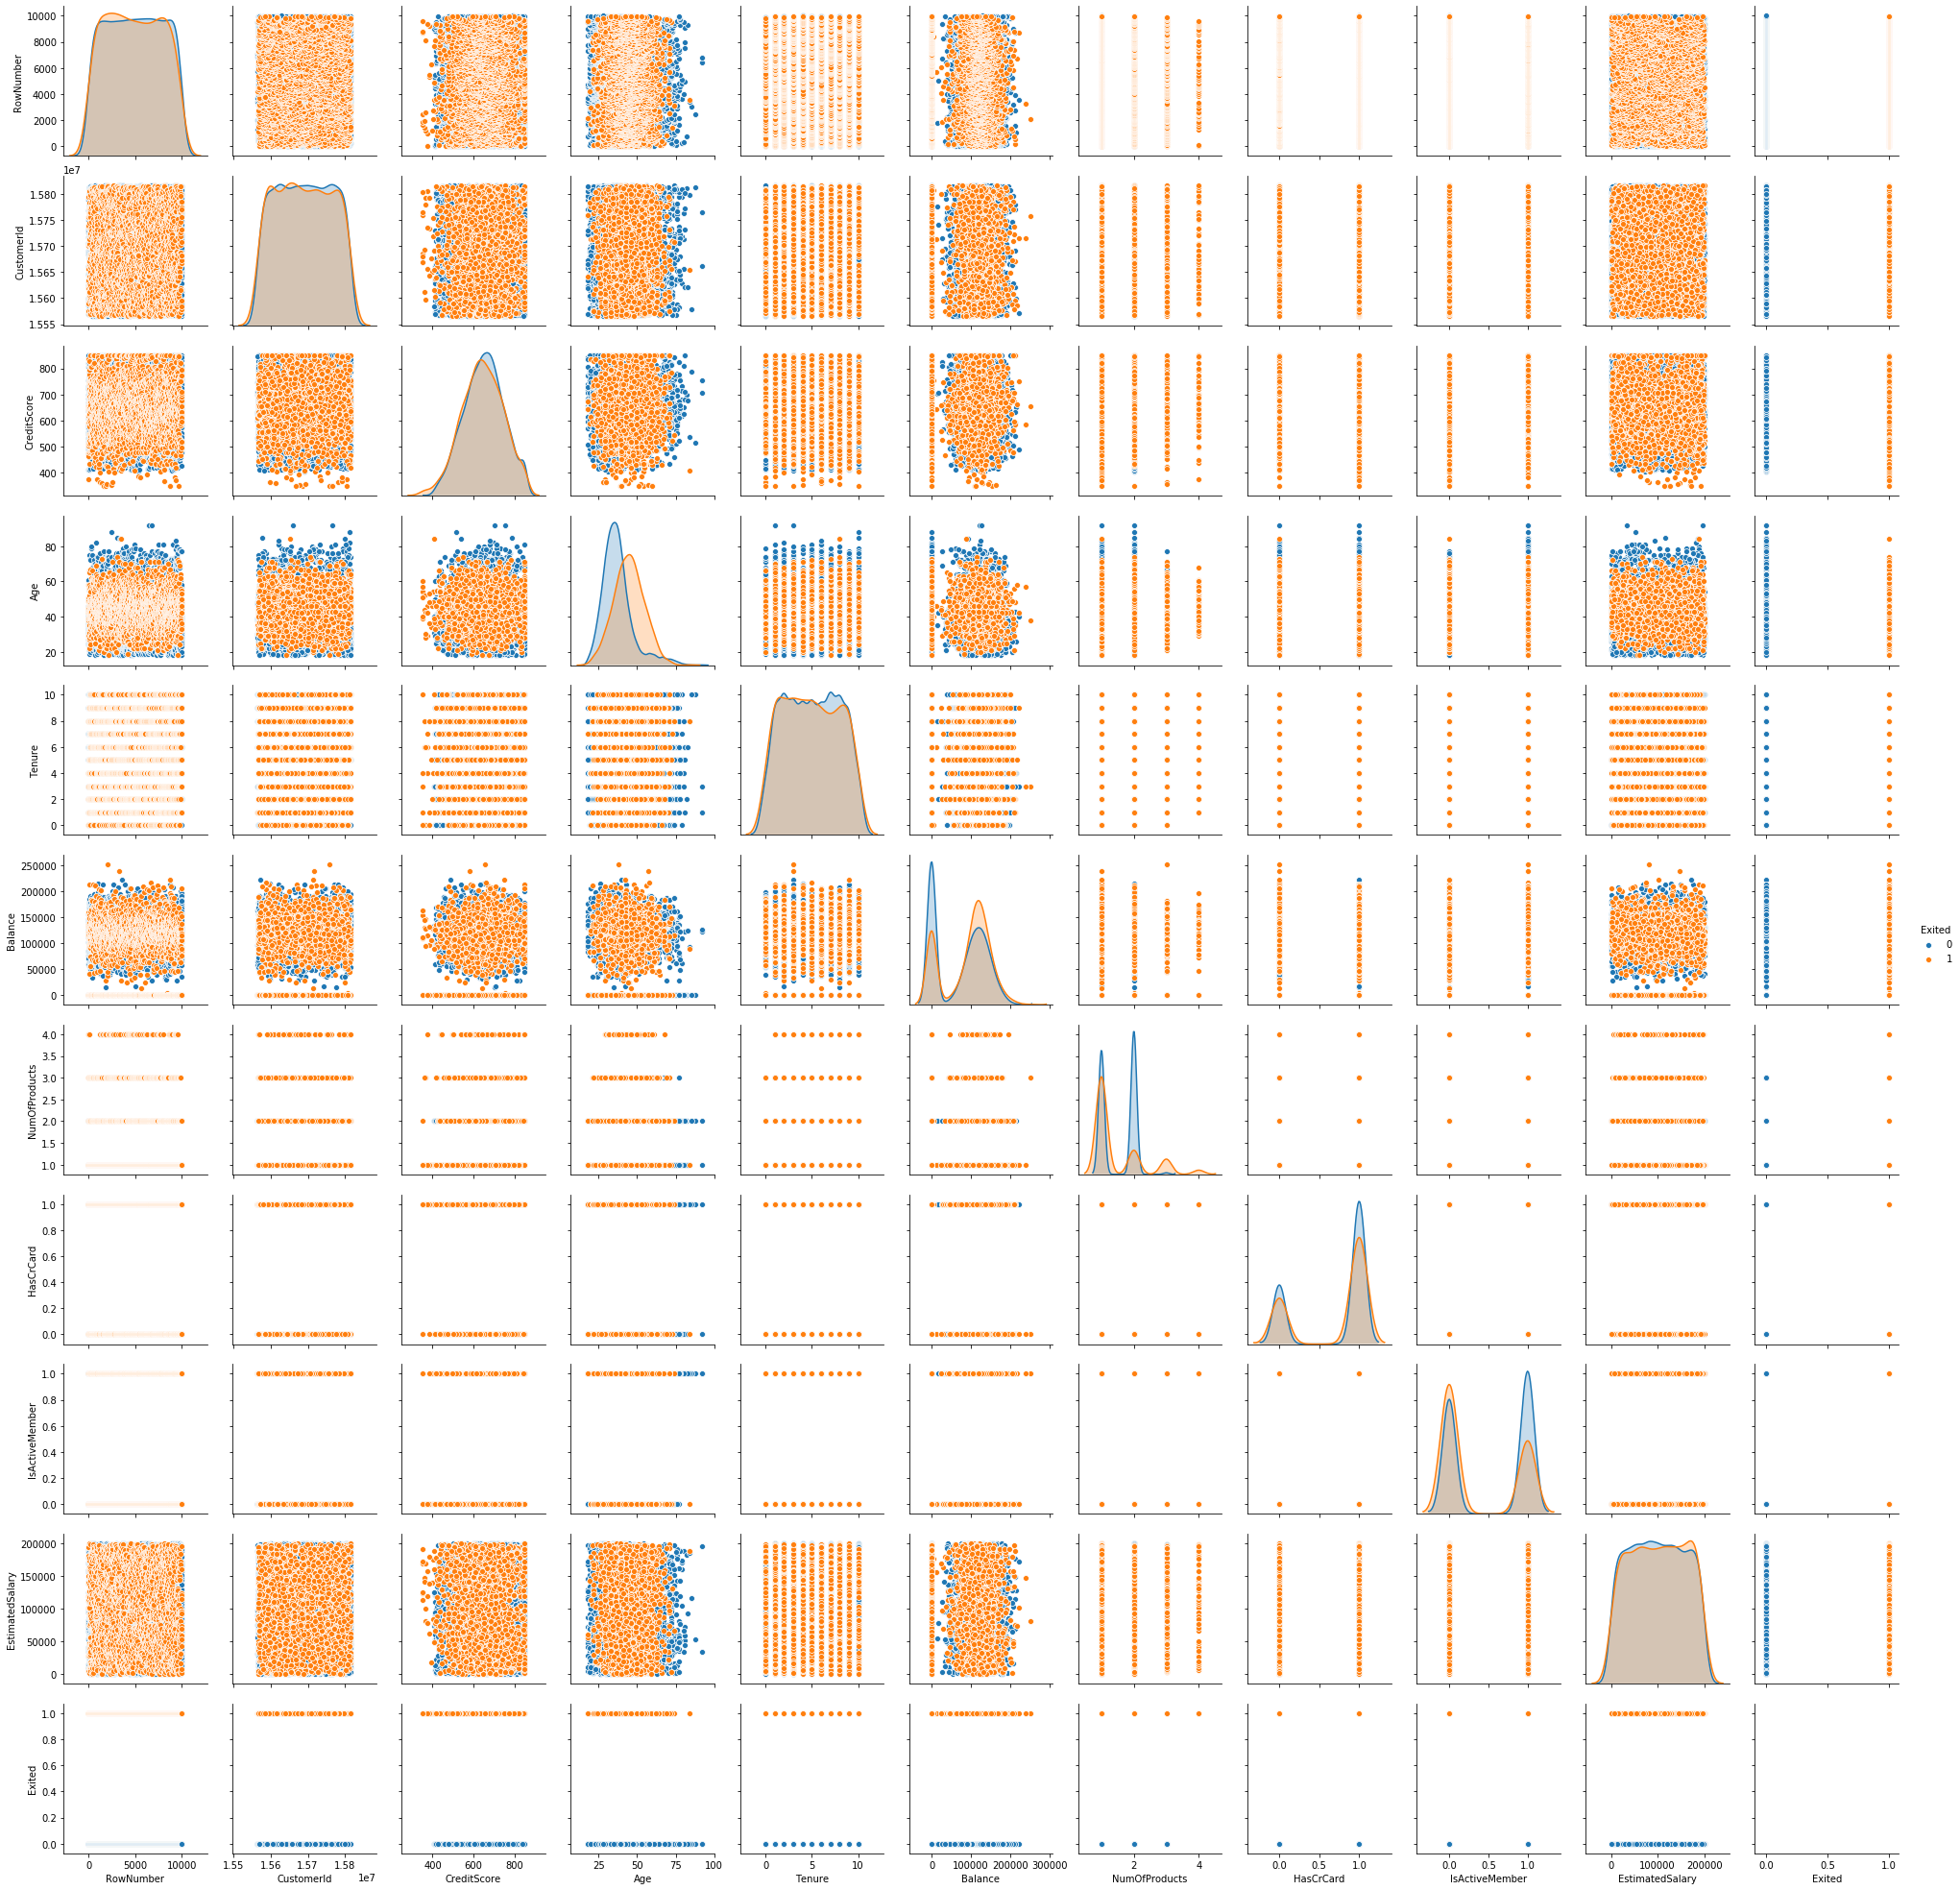

In [4]:
sns.pairplot(df,hue='Exited')

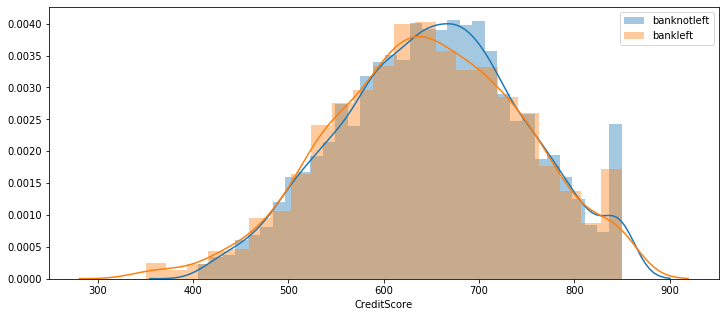

In [3]:
#analytics btw  Numeric v/s Categorial
#creditscore v/s Excited (here we are comparing excited with credit score)
plt.figure(figsize=(12,5))
sns.distplot(df.CreditScore[df.Exited==0])#banknotleft
sns.distplot(df.CreditScore[df.Exited==1])#bank left
plt.legend(['banknotleft','bankleft'])
plt.show()


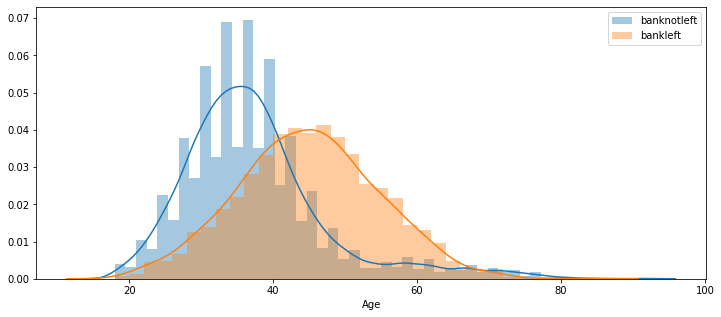

In [25]:
#analytics btw  Numeric v/s Categorial
#Age v/s Excited (here we are comparing excited with credit score)
plt.figure(figsize=(12,5))
sns.distplot(df.Age[df.Exited==0])#banknotleft
sns.distplot(df.Age[df.Exited==1])#bank left
plt.legend(['banknotleft','bankleft'])
plt.show()


1. here in graph represents that age with young age are not leaving(less dropout rate)
2. as the above graph shows tht majority of customers leaving are from old age group

<function matplotlib.pyplot.show(*args, **kw)>

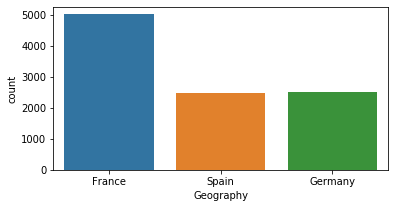

In [28]:
#categorical v/s categorial
# geography v/s  exited
plt.figure(figsize=(6,3))
sns.countplot(df.Geography)
plt.show

1. in the above graph it represents both leaving and not leaving

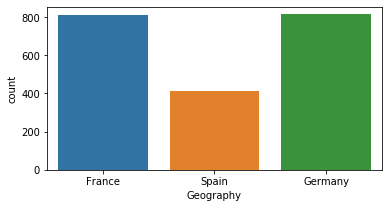

In [30]:
plt.figure(figsize=(6,3))
sns.countplot(df.Geography[df.Exited==1])#left the bank
plt.show()


2. here it represents how many have left the bank,here Germany people have left the bank as compared to other country

<function matplotlib.pyplot.show(*args, **kw)>

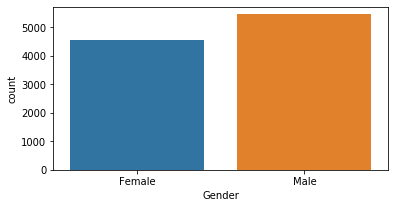

In [31]:
#categorical v/s categorial
# geography v/s  exited
plt.figure(figsize=(6,3))
sns.countplot(df.Gender)
plt.show

1. in the above graph it represents both leaving and not leaving

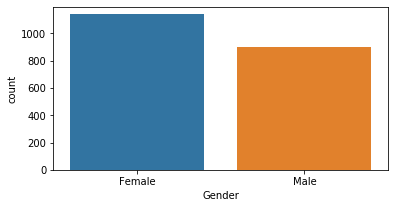

In [32]:
plt.figure(figsize=(6,3))
sns.countplot(df.Gender[df.Exited==1])#left the bank
plt.show()

2. here it represents how many have left the bank ,here the female customers left as compared to male

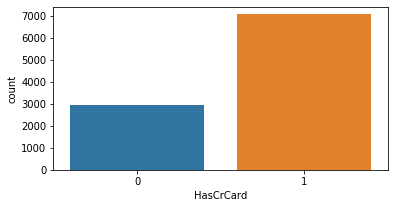

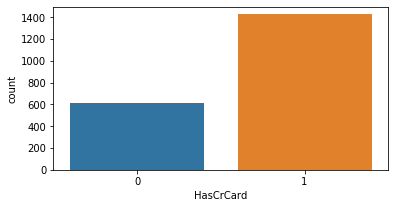

In [35]:
#categorical v/s categorial
# geography v/s  exited
plt.figure(figsize=(6,3))
sns.countplot(df.HasCrCard)
plt.show
plt.figure(figsize=(6,3))
sns.countplot(df.HasCrCard[df.Exited==1])#left the bank
plt.show()

1. here the ratio of having or not having credit card has no impact ,therefore selling credit cards had no impact on bank

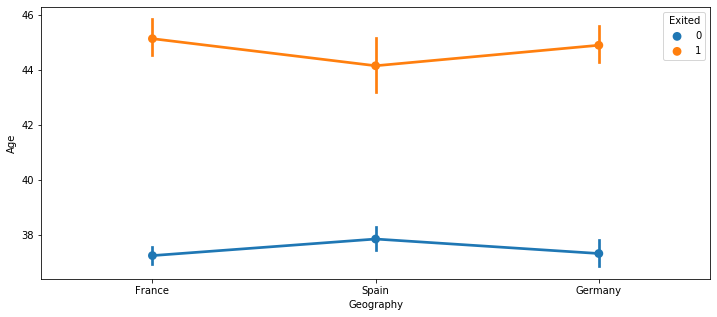

In [39]:
#multivariate analysis
#categorical v/s numerical v/s categorical 
#x ,y, hue>> x= cateogircal,y=numerical,hue= cateogrical
plt.figure(figsize=(12,5))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

1. here the least affected country(lessleft) is spain because the gap btw two lines is less as compared to other countries

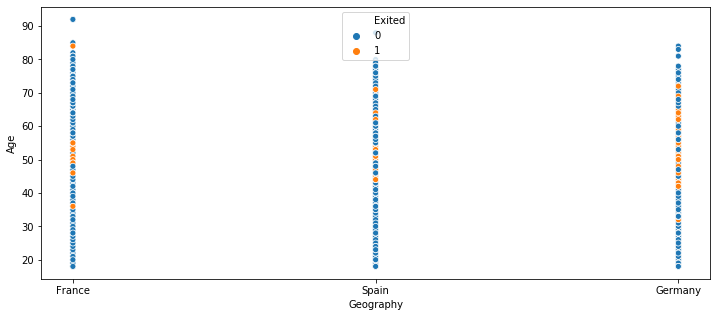

In [41]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

1. it is illogical to represent the categorical value in scatter(so dont follow)

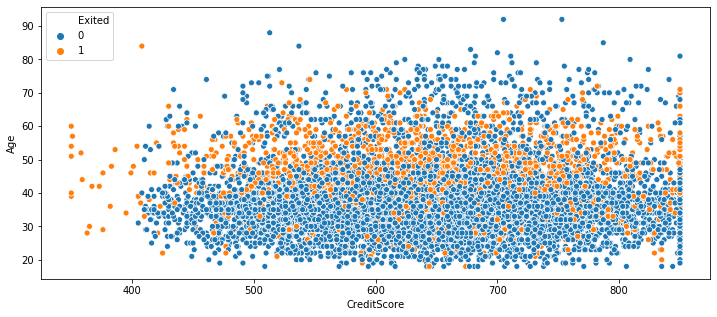

In [37]:
#numeric v/s numeric v/s categorical
#creditscore v/s age v/s exited
plt.figure(figsize=(12,5))
sns.scatterplot(x='CreditScore',y='Age',hue='Exited',data=df)
plt.show()
#scatterplot is used for numerical not in categorical

1. here the conclusion is  tht at the age of 40-60  more the oldage people are leaving the bank

# correlation

In [2]:
#always calculated btw two attributes
#gives clear info about linear pattern btw two attributesit
# it doesnt give to nonlinear pattern(refer notes)
#correlation always gives result of linear pattern
#correlation value is btw -1 to +1  correlation(x,y)= -1 to +1
#as higher the value of correlation is there and positive then it is very good correlation
#as much -ve then also it is stronger and good correlation
#bad correlation or non linear pattern (-0.1 to +0.1)
#higher -ve higher correlation
#higher +ve higher correlation
#closure to zero bad correlation

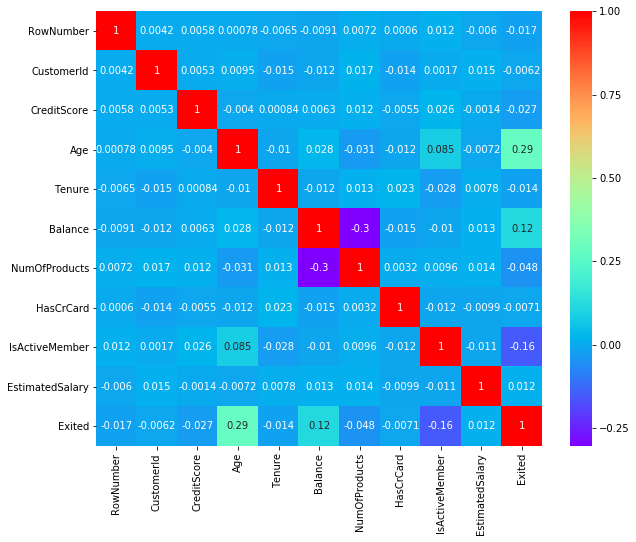

In [16]:
#correlation analysis
cor = df.corr()
#heatmap for visualization correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='rainbow')#if we will not write annot=True then the values will not show
plt.show()

In [17]:
#HERE in the above (age,balance,activemember)have good correlation
#here exited has good correlation with balance,balance has good correlation with Numofproducts
#therefore exited and Numofproducts have nonlinear correlation
#like a=b,b=c therefore there might have chances having a good correlation with a and c ,a=c